In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [16]:
data = pd.read_csv('moore.csv', header = None).values
X = data[:,0]
Y = data[:,1]

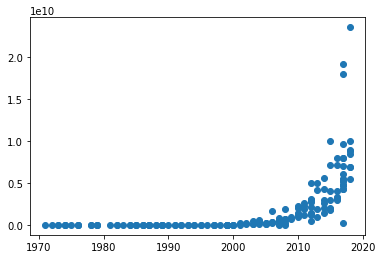

In [20]:
plt.scatter(X,Y);

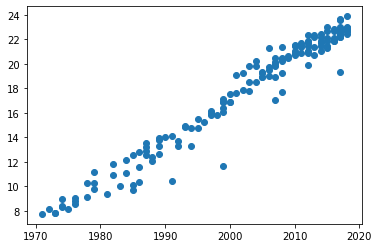

In [21]:
Y = np.log(Y)
plt.scatter(X,Y);

In [22]:
X = X - X.mean()

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr):
    if epoch >= 50:
        return 0.001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X,Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 350.1389 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 302.5739 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 240.1766 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 214.1128 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 218.7846 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 150.1730 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 87.7134 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 72.4662 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 52.8526 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 33.7973 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 3

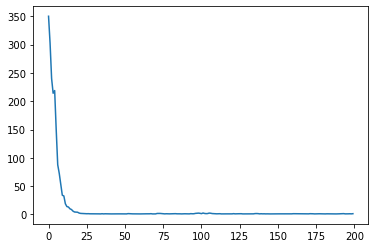

In [29]:
plt.plot(r.history['loss'], label='loss');

In [33]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.38381082]], dtype=float32), array([17.803848], dtype=float32)]


In [36]:
a = model.layers[0].get_weights()[0][0,0]

In [37]:
a

0.38381082